In [1]:
import sys
sys.path.insert(0, f'D:/OneDrive/Program/GitHub/EasyIDP')

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from easyric.objects import Pix4D
from easyric.io import shp, geotiff, plot
from easyric.calculate import geo2raw, geo2tiff

from easyric.caas_lite import TiffSpliter

In [2]:
project_name = 'broccoli_tanashi_5_20200417_mavicRGB_15m_M'
project_path = f"Z:/共享云端硬盘/broccoliProject/01_tanashi_broccoli2020_RGB_AP/{project_name}"
raw_img_folder=f"Z:/共享云端硬盘/broccoliProject/00_rgb_raw/{project_name}"
param_folder = f"{project_path}/params"

out_folder = f"Z:/共享云端硬盘/broccoliProject/10_anotation_use/jpg/{project_name}"
json_name = f"{out_folder}.json"

In [3]:
p4d = Pix4D(project_path=project_path, 
            raw_img_path=raw_img_folder, 
            project_name=project_name,
            param_folder=param_folder)

[Init][Pix4D] No ply given, however find 'broccoli_tanashi_5_20200417_mavicRGB_15m_M_group1_densified_point_cloud.ply' at current project folder
[Init][Pix4D] No dom given, however find 'broccoli_tanashi_5_20200417_mavicRGB_15m_M_transparent_mosaic_group1.tif' at current project folder
[Init][Pix4D] No dsm given, however find 'broccoli_tanashi_5_20200417_mavicRGB_15m_M_dsm.tif' at current project folder
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]


In [4]:
import pyproj

In [5]:
process_area = shp.read_shp2d(r"Z:/共享云端硬盘/broccoliProject/02_GIS/field_area/field_region.shp",
                              geotiff_proj=p4d.dom_header['proj'])

[io][shp][fields] Shp fields: {'ID': 0}
[io][shp][proj] find ESRI projection file Z:/共享云端硬盘/broccoliProject/02_GIS/field_area/field_region.prj, and successfully obtain projection cartesian


In [6]:
process_area

{'full': array([[ 368058.84844991, 3956058.41380904],
        [ 368097.93774535, 3956066.57940451],
        [ 368108.45553064, 3956016.23000645],
        [ 368069.36623521, 3956008.06441097],
        [ 368058.84844991, 3956058.41380904]])}

In [7]:
label_folder = f"Z:/共享云端硬盘/broccoliProject/10_locate_by_cv/color_label_0417_mavic"
bbox = pd.read_csv(os.path.join(label_folder, "Texture_CART", "bbox.csv"), index_col=0)

In [8]:
bbox

,offset_x,offset_y,xc,yc,x0,y0,x1,y1,w,h,area
0,0.0,2600.0,1093.5,572.5,1085.0,556.0,1102.0,589.0,33.0,17.0,141.0
1,0.0,2600.0,313.0,717.0,297.0,693.0,329.0,741.0,48.0,32.0,447.0
2,0.0,2600.0,170.0,820.5,157.0,812.0,183.0,829.0,17.0,26.0,113.0
3,0.0,2600.0,297.0,856.0,287.0,841.0,307.0,871.0,30.0,20.0,183.0
4,0.0,2600.0,1142.0,957.0,1132.0,942.0,1152.0,972.0,30.0,20.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...
11185,16900.0,16900.0,860.5,1181.0,844.0,1171.0,877.0,1191.0,20.0,33.0,204.0
11186,16900.0,16900.0,866.0,1213.5,855.0,1195.0,877.0,1232.0,37.0,22.0,194.0
11187,16900.0,16900.0,495.0,1211.5,484.0,1198.0,506.0,1225.0,27.0,22.0,243.0
11188,16900.0,16900.0,90.0,1322.5,79.0,1317.0,101.0,1328.0,11.0,22.0,115.0


In [9]:
bbox_dom = bbox[['w', 'h', 'area']].copy()
bbox_dom['xc'] = bbox.xc + bbox.offset_x
bbox_dom['yc'] = bbox.yc + bbox.offset_y
bbox_dom['x0'] = bbox.x0 + bbox.offset_x
bbox_dom['y0'] = bbox.y0 + bbox.offset_y
bbox_dom['x1'] = bbox.x1 + bbox.offset_x
bbox_dom['y1'] = bbox.y1 + bbox.offset_y

bbox_dom

,w,h,area,xc,yc,x0,y0,x1,y1
0,33.0,17.0,141.0,1093.5,3172.5,1085.0,3156.0,1102.0,3189.0
1,48.0,32.0,447.0,313.0,3317.0,297.0,3293.0,329.0,3341.0
2,17.0,26.0,113.0,170.0,3420.5,157.0,3412.0,183.0,3429.0
3,30.0,20.0,183.0,297.0,3456.0,287.0,3441.0,307.0,3471.0
4,30.0,20.0,116.0,1142.0,3557.0,1132.0,3542.0,1152.0,3572.0
...,...,...,...,...,...,...,...,...,...
11185,20.0,33.0,204.0,17760.5,18081.0,17744.0,18071.0,17777.0,18091.0
11186,37.0,22.0,194.0,17766.0,18113.5,17755.0,18095.0,17777.0,18132.0
11187,27.0,22.0,243.0,17395.0,18111.5,17384.0,18098.0,17406.0,18125.0
11188,11.0,22.0,115.0,16990.0,18222.5,16979.0,18217.0,17001.0,18228.0


In [10]:
point_hv = bbox_dom[['xc', 'yc']].values
point_hv

array([[ 1093.5,  3172.5],
       [  313. ,  3317. ],
       [  170. ,  3420.5],
       ...,
       [17395. , 18111.5],
       [16990. , 18222.5],
       [16990. , 18222.5]])

In [11]:
geo_xy = geotiff.pixel2geo(point_hv, p4d.dom_header)
geo_xy

array([[ 368058.18567 , 3956061.03668 ],
       [ 368055.695875, 3956060.575725],
       [ 368055.239705, 3956060.24556 ],
       ...,
       [ 368110.187455, 3956013.38127 ],
       [ 368108.895505, 3956013.02718 ],
       [ 368108.895505, 3956013.02718 ]])

In [12]:
bbox_dom['x_geo'] = geo_xy[:,0]
bbox_dom['y_geo'] = geo_xy[:,1]

In [13]:
p4d.dom_header

{'width': 17954,
 'length': 21084,
 'scale': (0.00319, 0.00319),
 'tie_point': (368054.69581, 3956071.1585500003),
 'nodata': None,
 'proj': <Projected CRS: EPSG:32654>
 Name: WGS 84 / UTM zone 54N
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: World - N hemisphere - 138°E to 144°E - by country
 - bounds: (138.0, 0.0, 144.0, 84.0)
 Coordinate Operation:
 - name: UTM zone 54N
 - method: Transverse Mercator
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich}

In [14]:
# save to shp to see
import shapefile

with shapefile.Writer('out/07_center_raw.shp') as shp:
    shp.field('name', 'C')
    for i in range(len(bbox_dom)):
        x0 = geo_xy[i,0]
        y0 = geo_xy[i,1]

        shp.point(x0, y0)
        shp.record(str(i))

# judge whether in field area

In [15]:
from matplotlib.patches import Polygon

In [16]:
field_area = Polygon(process_area['full'])
field_area

In [17]:
in_tag = field_area.contains_points(geo_xy)
in_tag

array([False, False, False, ..., False, False, False])

In [18]:
bbox_dom_in = bbox_dom.loc[in_tag, :]

In [19]:
bbox_dom_in

,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo
20,49.0,35.0,1010.0,1482.5,4143.5,1465.0,4119.0,1500.0,4168.0,368059.426580,3.956058e+06
21,40.0,32.0,415.0,1484.0,4255.0,1468.0,4235.0,1500.0,4275.0,368059.431365,3.956058e+06
57,48.0,58.0,1476.0,2553.0,3883.0,2524.0,3859.0,2582.0,3907.0,368062.841475,3.956059e+06
58,45.0,48.0,1208.0,2342.0,3931.5,2318.0,3909.0,2366.0,3954.0,368062.168385,3.956059e+06
59,65.0,53.0,1779.0,2579.5,3966.5,2553.0,3934.0,2606.0,3999.0,368062.926010,3.956059e+06
...,...,...,...,...,...,...,...,...,...,...,...
11132,48.0,61.0,1466.0,15660.5,16996.0,15630.0,16972.0,15691.0,17020.0,368104.654400,3.956017e+06
11133,24.0,25.0,314.0,16132.5,17003.0,16120.0,16991.0,16145.0,17015.0,368106.160080,3.956017e+06
11137,47.0,51.0,1212.0,15929.5,17050.5,15904.0,17027.0,15955.0,17074.0,368105.512510,3.956017e+06
11140,69.0,51.0,1217.0,16768.5,17074.5,16743.0,17040.0,16794.0,17109.0,368108.188920,3.956017e+06


In [20]:
process_area_px = geotiff.geo2pixel(process_area['full'], p4d.dom_header)
process_area_px

array([[ 1301,  3995],
       [13555,  1435],
       [16852, 17218],
       [ 4598, 19778],
       [ 1301,  3995]])

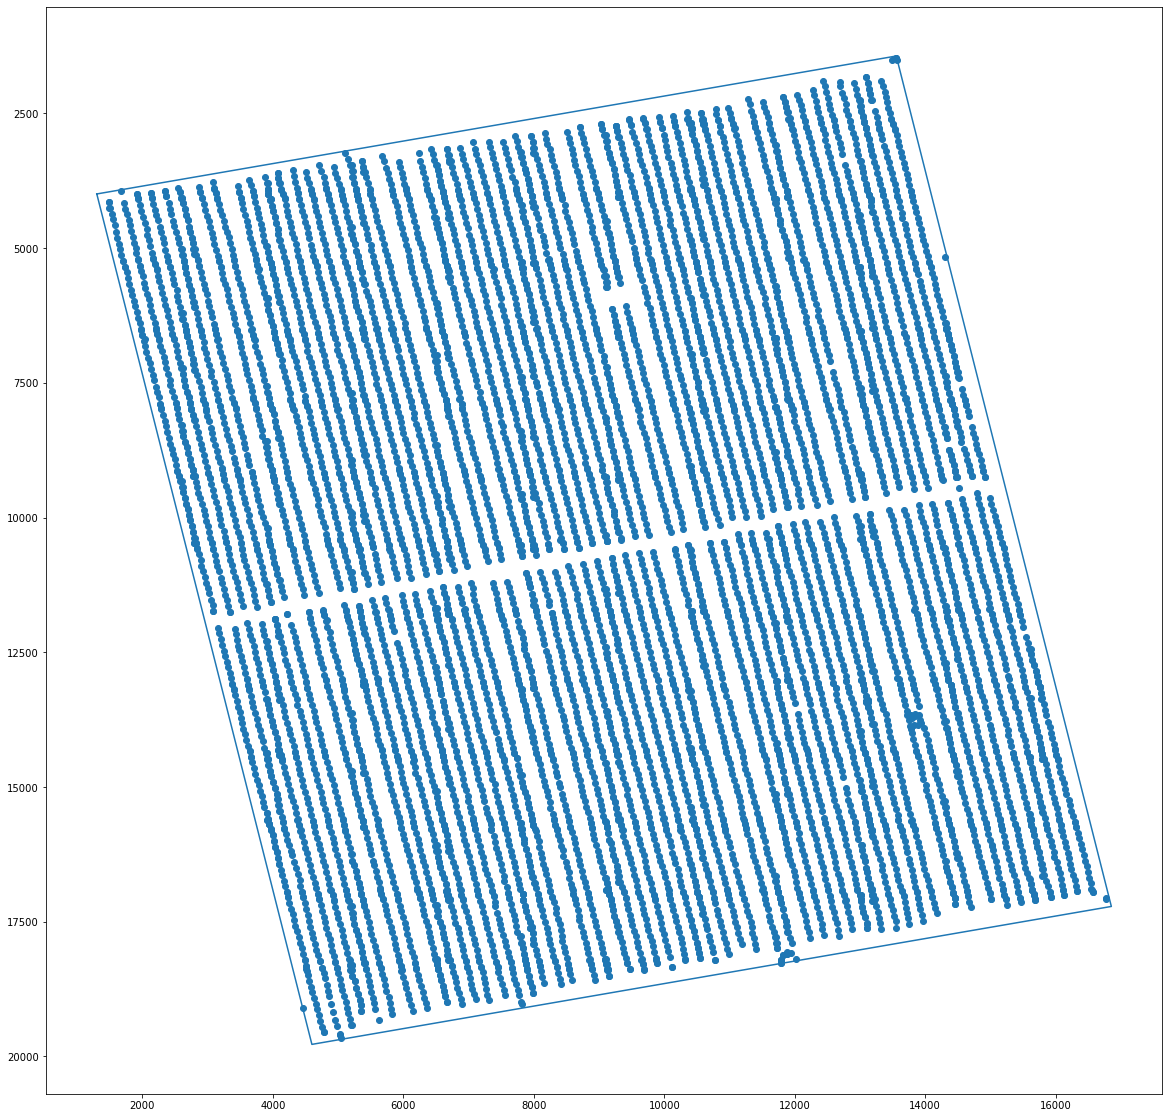

In [21]:
fig, ax = plt.subplots(1,1, figsize=(20,20))

ax.plot(*process_area_px.T)
ax.scatter(bbox_dom_in.xc, bbox_dom_in.yc)
ax.invert_yaxis()

plt.show()

In [22]:
bbox_dom_in.area.max(), bbox_dom_in.area.min()

(3686.0, 100.0)

(array([ 399.,  397.,  529., 1205., 2557., 3082., 1823.,  578.,  110.,
          15.]),
 array([ 100. ,  458.6,  817.2, 1175.8, 1534.4, 1893. , 2251.6, 2610.2,
        2968.8, 3327.4, 3686. ]),
 <a list of 10 Patch objects>)

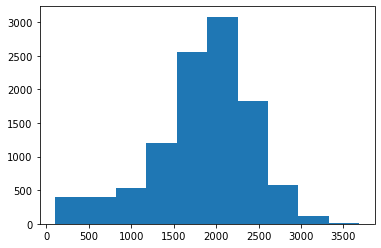

In [23]:
plt.hist(bbox_dom_in.area)

In [24]:
thresh = bbox_dom_in.area / bbox_dom_in.area.max()
thresh

20       0.274010
21       0.112588
57       0.400434
58       0.327727
59       0.482637
           ...   
11132    0.397721
11133    0.085187
11137    0.328812
11140    0.330168
11141    0.463646
Name: area, Length: 10695, dtype: float64

# remove duplicates

In [25]:
def NMS(arr, thresh):
    # 首先数据赋值和计算对应矩形框的面积
    # arr的数据格式是arr = [[ xmin, ymin, xmax, ymax,scores]....]

    x1 = arr[:, 0]
    y1 = arr[:, 1]
    x2 = arr[:, 2]
    y2 = arr[:, 3]
    score = arr[:, 4]

    # 所有矩形框的面积
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)

    # 取出分数从大到小排列的索引。.argsort()是从小到大排列，[::-1]是列表头和尾颠倒一下。
    order = score.argsort()[::-1]
    # 上面这两句比如分数score = [0.72 0.8  0.92 0.72 0.81 0.9 ]
    # 对应的索引order = [2, 5, 4, 1, 3, 0]记住是取出索引，scores列表没变。

    # 这边的keep用于存放，NMS后剩余的方框
    keep = []

    # order会剔除遍历过的方框，和合并过的方框
    while order.size > 0:
        # 取出第一个方框进行和其他方框比对，看有没有可以合并的，就是取最大score的索引
        i = order[0]

        # 因为我们这边分数已经按从大到小排列了。
        # 所以如果有合并存在，也是保留分数最高的这个，也就是我们现在那个这个
        # keep保留的是索引值，不是具体的分数。
        keep.append(i)

        # 计算交集的左上角和右下角
        # 这里要注意，比如x1[i]这个方框的左上角x和所有其他的方框的左上角x的
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        # 这边要注意，如果两个方框相交，xx2-xx1和yy2-yy1是正的。
        # 如果两个方框不相交，xx2-xx1和yy2-yy1是负的，我们把不相交的w和h设为0.
        w = np.maximum(0, xx2-xx1+1)
        h = np.maximum(0, yy2-yy1+1)
        # 计算重叠面积就是上面说的交集面积。不相交因为W和H都是0，所以不相交面积为0
        inter = w * h

        # 这个就是IOU公式（交并比）。
        # 得出来的ious是一个列表，里面拥有当前方框和其他所有方框的IOU结果。
        ious = inter / (areas[i] + areas[order[1:]] - inter)

        # 接下来是合并重叠度最大的方框，也就是合并ious中值大于thresh的方框
        # 我们合并的操作就是把他们剔除，因为我们合并这些方框只保留下分数最高的。
        # 我们经过排序当前我们操作的方框就是分数最高的，所以我们剔除其他和当前重叠度最高的方框
        # 这里np.where(ious<=thresh)[0]是一个固定写法。
        index = np.where(ious <= thresh)[0]

        # 把留下来框在进行NMS操作
        # 这边留下的框是去除当前操作的框，和当前操作的框重叠度大于thresh的框
        # 每一次都会先去除当前操作框（n个框计算n-1个IOU值），所以索引的列表就会向前移动移位，要还原就+1，向后移动一位
        order = order[index+1]

    return keep

In [26]:
keep_id = NMS(bbox_dom_in[['x0', 'y0', 'x1', 'y1', 'area']].to_numpy(), 0.0)
len(keep_id)

7561

In [27]:
bbox_dom_in['keep'] = False
bbox_dom_in

D:\Applications\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep
20,49.0,35.0,1010.0,1482.5,4143.5,1465.0,4119.0,1500.0,4168.0,368059.426580,3.956058e+06,False
21,40.0,32.0,415.0,1484.0,4255.0,1468.0,4235.0,1500.0,4275.0,368059.431365,3.956058e+06,False
57,48.0,58.0,1476.0,2553.0,3883.0,2524.0,3859.0,2582.0,3907.0,368062.841475,3.956059e+06,False
58,45.0,48.0,1208.0,2342.0,3931.5,2318.0,3909.0,2366.0,3954.0,368062.168385,3.956059e+06,False
59,65.0,53.0,1779.0,2579.5,3966.5,2553.0,3934.0,2606.0,3999.0,368062.926010,3.956059e+06,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11132,48.0,61.0,1466.0,15660.5,16996.0,15630.0,16972.0,15691.0,17020.0,368104.654400,3.956017e+06,False
11133,24.0,25.0,314.0,16132.5,17003.0,16120.0,16991.0,16145.0,17015.0,368106.160080,3.956017e+06,False
11137,47.0,51.0,1212.0,15929.5,17050.5,15904.0,17027.0,15955.0,17074.0,368105.512510,3.956017e+06,False
11140,69.0,51.0,1217.0,16768.5,17074.5,16743.0,17040.0,16794.0,17109.0,368108.188920,3.956017e+06,False


In [28]:
bbox_dom_in.iloc[keep_id, -1] = True
bbox_dom_in

D:\Applications\Anaconda\envs\lab\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep
20,49.0,35.0,1010.0,1482.5,4143.5,1465.0,4119.0,1500.0,4168.0,368059.426580,3.956058e+06,False
21,40.0,32.0,415.0,1484.0,4255.0,1468.0,4235.0,1500.0,4275.0,368059.431365,3.956058e+06,False
57,48.0,58.0,1476.0,2553.0,3883.0,2524.0,3859.0,2582.0,3907.0,368062.841475,3.956059e+06,True
58,45.0,48.0,1208.0,2342.0,3931.5,2318.0,3909.0,2366.0,3954.0,368062.168385,3.956059e+06,False
59,65.0,53.0,1779.0,2579.5,3966.5,2553.0,3934.0,2606.0,3999.0,368062.926010,3.956059e+06,True
...,...,...,...,...,...,...,...,...,...,...,...,...
11132,48.0,61.0,1466.0,15660.5,16996.0,15630.0,16972.0,15691.0,17020.0,368104.654400,3.956017e+06,False
11133,24.0,25.0,314.0,16132.5,17003.0,16120.0,16991.0,16145.0,17015.0,368106.160080,3.956017e+06,True
11137,47.0,51.0,1212.0,15929.5,17050.5,15904.0,17027.0,15955.0,17074.0,368105.512510,3.956017e+06,True
11140,69.0,51.0,1217.0,16768.5,17074.5,16743.0,17040.0,16794.0,17109.0,368108.188920,3.956017e+06,True


In [29]:
keep_bbox = bbox_dom_in[bbox_dom_in.keep]
keep_bbox

,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep
57,48.0,58.0,1476.0,2553.0,3883.0,2524.0,3859.0,2582.0,3907.0,368062.841475,3.956059e+06,True
59,65.0,53.0,1779.0,2579.5,3966.5,2553.0,3934.0,2606.0,3999.0,368062.926010,3.956059e+06,True
61,48.0,39.0,1006.0,1912.5,3987.0,1893.0,3963.0,1932.0,4011.0,368060.798280,3.956058e+06,True
63,59.0,63.0,2014.0,2154.5,4063.5,2123.0,4034.0,2186.0,4093.0,368061.570260,3.956058e+06,True
64,60.0,77.0,2412.0,2590.5,4065.0,2552.0,4035.0,2629.0,4095.0,368062.961100,3.956058e+06,True
...,...,...,...,...,...,...,...,...,...,...,...,...
11115,45.0,48.0,680.0,16565.0,16949.5,16541.0,16927.0,16589.0,16972.0,368107.539755,3.956017e+06,True
11128,68.0,43.0,1352.0,16328.5,16934.0,16307.0,16900.0,16350.0,16968.0,368106.785320,3.956017e+06,True
11133,24.0,25.0,314.0,16132.5,17003.0,16120.0,16991.0,16145.0,17015.0,368106.160080,3.956017e+06,True
11137,47.0,51.0,1212.0,15929.5,17050.5,15904.0,17027.0,15955.0,17074.0,368105.512510,3.956017e+06,True


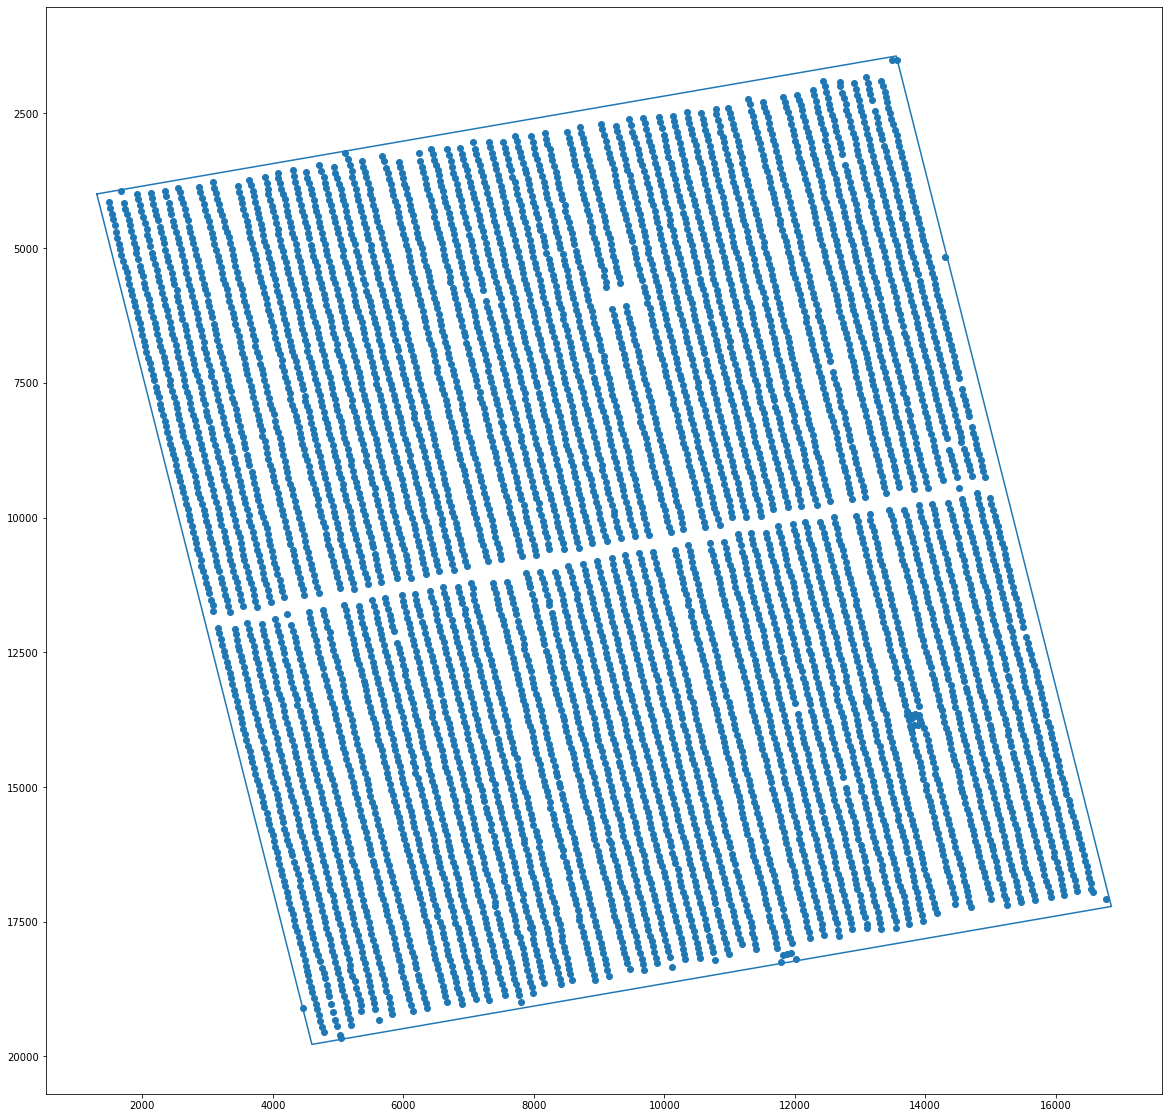

In [30]:
fig, ax = plt.subplots(1,1, figsize=(20,20))

ax.plot(*process_area_px.T)
ax.scatter(keep_bbox.xc, keep_bbox.yc)
ax.invert_yaxis()

plt.show()

# axis revert

In [31]:
xu = process_area_px[1,:] - process_area_px[0,:]
yu = process_area_px[1,:] - process_area_px[2,:]

xu, yu

(array([12254, -2560]), array([ -3297, -15783]))

In [32]:
# 转换为单位向量
def vector_mod(Ax, By):
    return np.sqrt(np.sum(np.square([Ax, By])))

In [33]:
v1 = xu / vector_mod(*xu)
v2 = yu / vector_mod(*yu)

v1, v2

(array([ 0.97886729, -0.20449651]), array([-0.20448176, -0.97887037]))

In [34]:
cvtmat = np.vstack([v1, v2]).T
cvtmat

array([[ 0.97886729, -0.20448176],
       [-0.20449651, -0.97887037]])

In [35]:
cvt_xy = np.linalg.inv(cvtmat).dot(keep_bbox[['xc', 'yc']].to_numpy().T).T
cvt_xy

array([[  1705.05339022,  -4323.02129442],
       [  1713.91922815,  -4410.17587094],
       [  1056.82081233,  -4293.84347634],
       ...,
       [ 12314.822943  , -19942.72056959],
       [ 12106.39937338, -19947.70397387],
       [ 12922.76405526, -20142.7693632 ]])

In [36]:
keep_bbox['cvt_x'] = cvt_xy[:,0]
keep_bbox['cvt_y'] = cvt_xy[:,1]
keep_bbox

D:\Applications\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Applications\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep,cvt_x,cvt_y
57,48.0,58.0,1476.0,2553.0,3883.0,2524.0,3859.0,2582.0,3907.0,368062.841475,3.956059e+06,True,1705.053390,-4323.021294
59,65.0,53.0,1779.0,2579.5,3966.5,2553.0,3934.0,2606.0,3999.0,368062.926010,3.956059e+06,True,1713.919228,-4410.175871
61,48.0,39.0,1006.0,1912.5,3987.0,1893.0,3963.0,1932.0,4011.0,368060.798280,3.956058e+06,True,1056.820812,-4293.843476
63,59.0,63.0,2014.0,2154.5,4063.5,2123.0,4034.0,2186.0,4093.0,368061.570260,3.956058e+06,True,1278.064588,-4418.214980
64,60.0,77.0,2412.0,2590.5,4065.0,2552.0,4035.0,2629.0,4095.0,368062.961100,3.956058e+06,True,1704.545349,-4508.843761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,45.0,48.0,680.0,16565.0,16949.5,16541.0,16927.0,16589.0,16972.0,368107.539755,3.956017e+06,True,12749.124154,-19978.795911
11128,68.0,43.0,1352.0,16328.5,16934.0,16307.0,16900.0,16350.0,16968.0,368106.785320,3.956017e+06,True,12520.790778,-19915.260043
11133,24.0,25.0,314.0,16132.5,17003.0,16120.0,16991.0,16145.0,17015.0,368106.160080,3.956017e+06,True,12314.822943,-19942.720570
11137,47.0,51.0,1212.0,15929.5,17050.5,15904.0,17027.0,15955.0,17074.0,368105.512510,3.956017e+06,True,12106.399373,-19947.703974


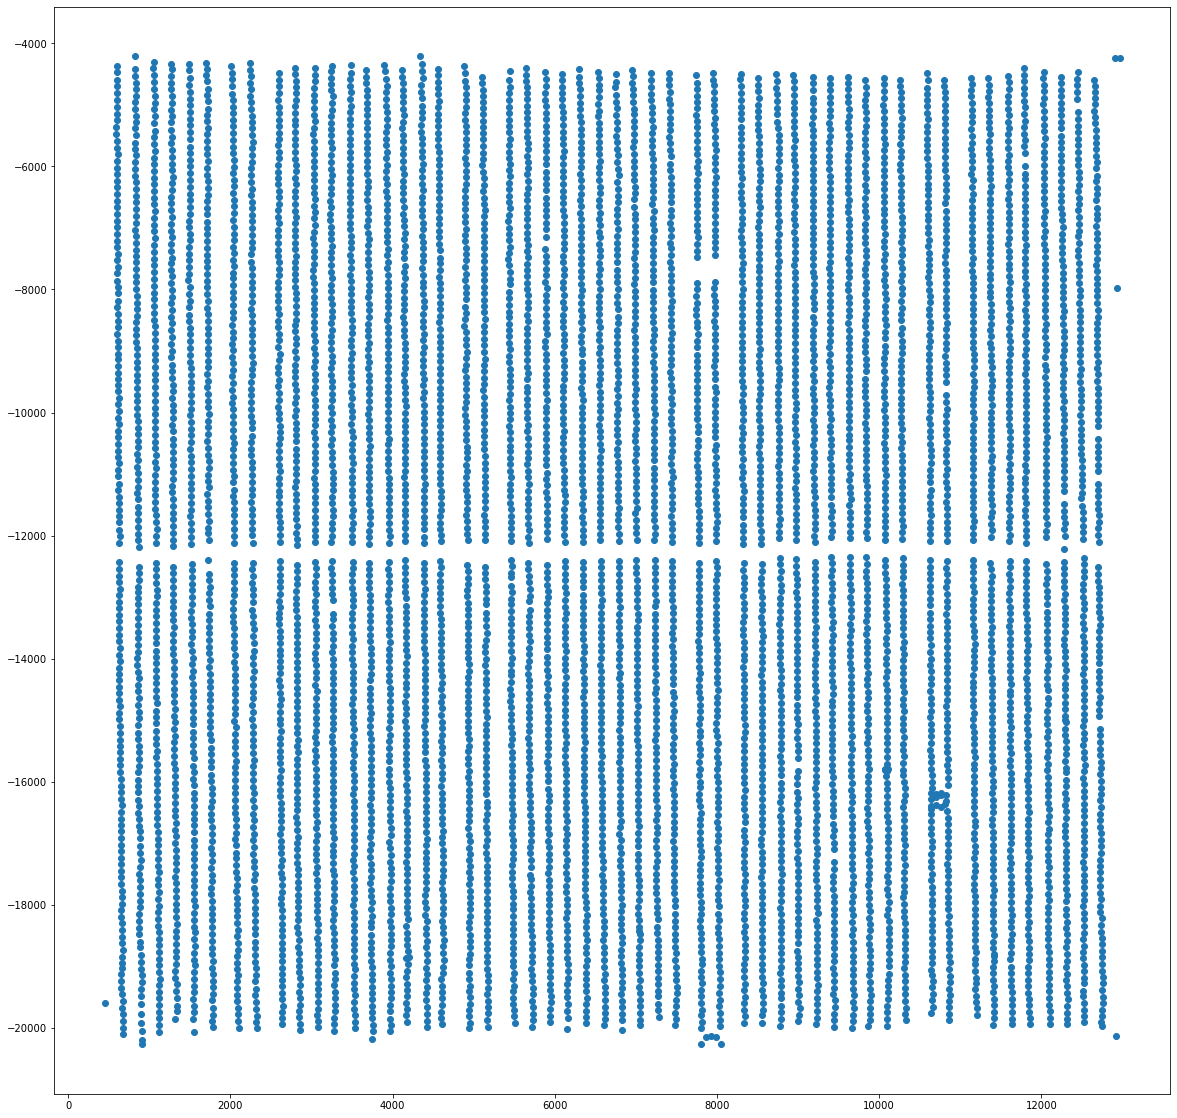

In [37]:
fig, ax = plt.subplots(1,1, figsize=(20,20))

ax.scatter(*cvt_xy.T, )

plt.show()

# 找到垄的轴线，通过点的密度来实现

In [38]:
v, n = np.unique((keep_bbox.cvt_x / 11).astype(int) * 11, return_counts=True)

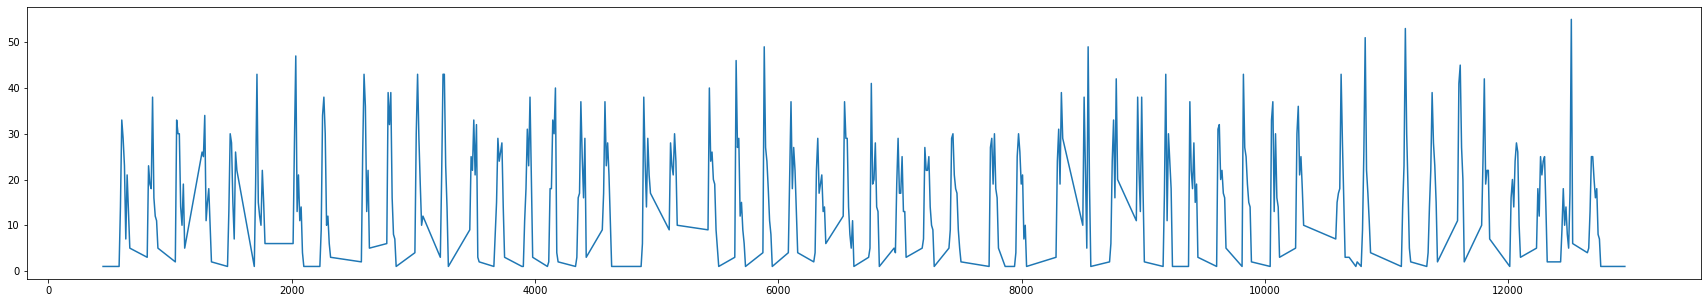

In [39]:
fig, ax = plt.subplots(1,1, figsize=(30,5))
ax.plot(v,n)
plt.show()

In [40]:
from scipy.signal import find_peaks

52


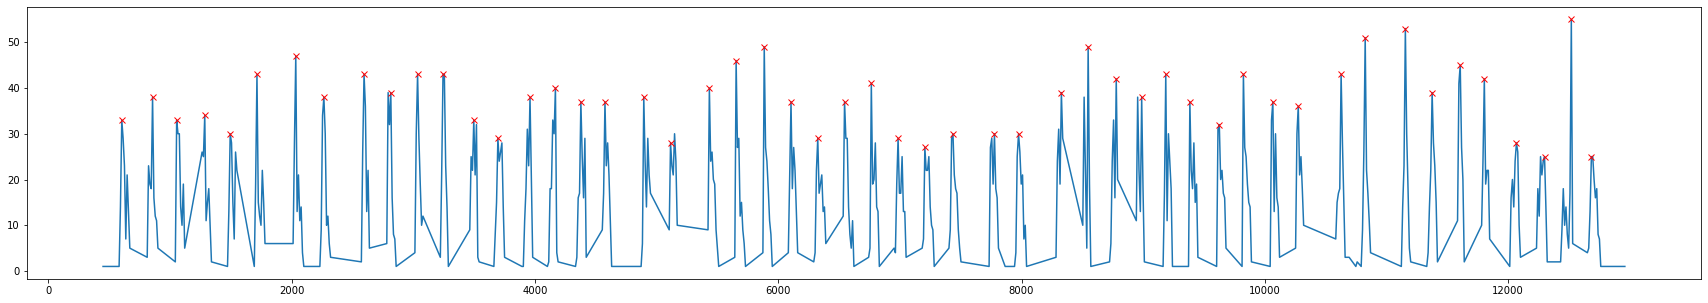

In [41]:
peaks, _ = find_peaks(n, distance=5, height=20)
print(len(peaks))

fig, ax = plt.subplots(1,1, figsize=(30,5))
ax.plot(v,n)
for i in peaks:
    ax.plot(v[i], n[i], 'rx')
plt.show()

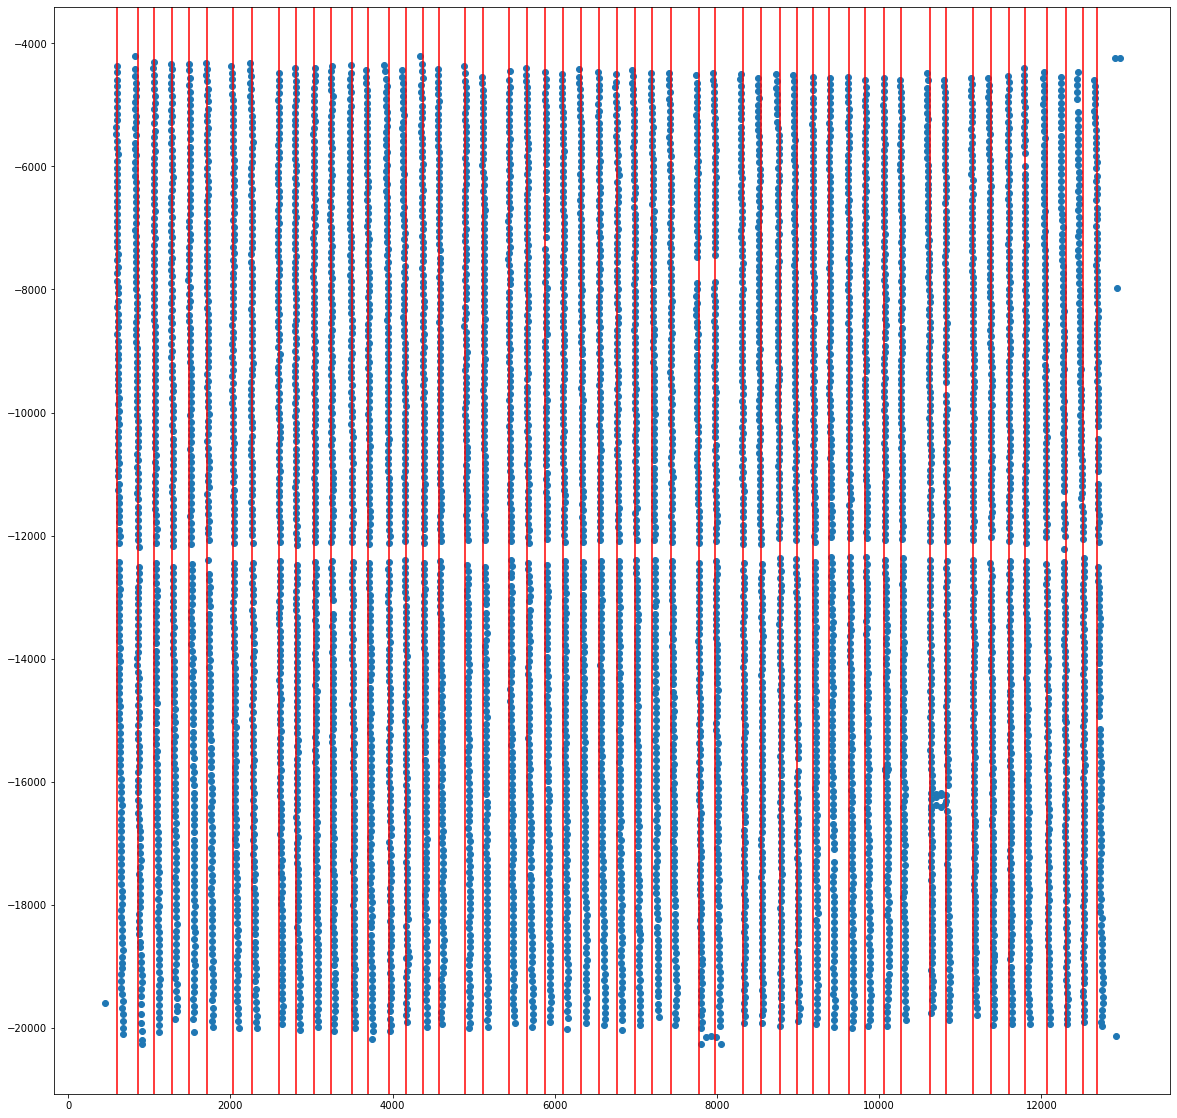

In [42]:
fig, ax = plt.subplots(1,1, figsize=(20,20))

ax.scatter(*cvt_xy.T, )

for i in peaks:
    ax.axvline(x=v[i],c='r')

plt.show()

In [43]:
peak_x = v[peaks]
peak_x

array([  605,   858,  1056,  1287,  1496,  1716,  2035,  2266,  2596,
        2816,  3036,  3245,  3498,  3696,  3960,  4169,  4378,  4576,
        4895,  5115,  5434,  5654,  5885,  6105,  6325,  6545,  6765,
        6985,  7205,  7436,  7777,  7975,  8327,  8547,  8778,  8987,
        9185,  9383,  9625,  9823, 10065, 10274, 10626, 10824, 11154,
       11374, 11605, 11803, 12067, 12298, 12518, 12683])

In [44]:
buffer = peak_x[1:] - peak_x[:-1]
buffer = np.append(buffer, buffer[-1])
buffer

array([253, 198, 231, 209, 220, 319, 231, 330, 220, 220, 209, 253, 198,
       264, 209, 209, 198, 319, 220, 319, 220, 231, 220, 220, 220, 220,
       220, 220, 231, 341, 198, 352, 220, 231, 209, 198, 198, 242, 198,
       242, 209, 352, 198, 330, 220, 231, 198, 264, 231, 220, 165, 165])

## pick the first column for test

In [45]:
buffer_ratio = 0.7
for i, b in zip(peak_x, buffer):
    range_st = i - b * buffer_ratio
    range_ed = i + b * buffer_ratio
    
    selected = (keep_bbox.cvt_x >= range_st ) & (keep_bbox.cvt_x <= range_ed)
    
    selected_xy = keep_bbox.loc[selected, ['cvt_x', 'cvt_y']]
    
    
    break
selected

57       False
59       False
61       False
63       False
64       False
         ...  
11115    False
11128    False
11133    False
11137    False
11140    False
Name: cvt_x, Length: 7561, dtype: bool

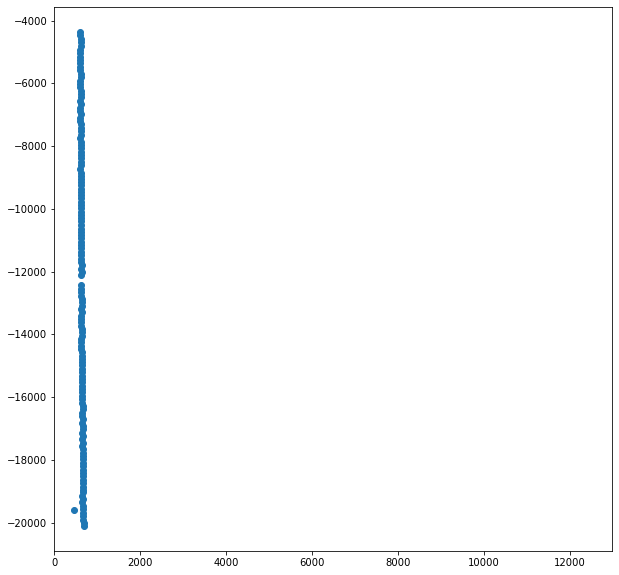

In [46]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(selected_xy['cvt_x'], selected_xy['cvt_y'])
ax.set_xlim(0, 13000)

plt.show()

In [47]:
from sklearn.linear_model import RANSACRegressor

In [48]:
from scipy import stats

In [49]:
stats.median_abs_deviation(selected_xy.cvt_x)

17.0317119050369

In [50]:
X = np.ones((len(selected_xy), 2))
X[:, 1] = selected_xy.cvt_x

reg = RANSACRegressor(random_state=0).fit(X, selected_xy['cvt_y'])

In [51]:
inlier_mask = reg.inlier_mask_
inlier_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## sort by Y axis

In [52]:
selected_xy_sort = selected_xy.loc[inlier_mask,:].sort_values(by=['cvt_y'], ascending=False)
selected_xy_sort

,cvt_x,cvt_y
75,606.841767,-4359.716197
81,601.274523,-4471.949155
89,607.899621,-4591.837153
94,608.416686,-4692.060574
102,607.641553,-4805.805449
...,...,...
2113,670.458387,-19682.490050
2117,672.524230,-19785.080199
2120,672.238532,-19898.927322
2122,680.419012,-20008.924398


In [53]:
np.linspace(1,3, num=3)

array([1., 2., 3.])

In [54]:
st_id = 3
fid = np.linspace(st_id, len(selected_xy_sort)+st_id-1, num=len(selected_xy_sort)).astype(int)
fid

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148])

In [55]:
selected_xy_sort['fid'] = fid
selected_xy_sort

,cvt_x,cvt_y,fid
75,606.841767,-4359.716197,3
81,601.274523,-4471.949155,4
89,607.899621,-4591.837153,5
94,608.416686,-4692.060574,6
102,607.641553,-4805.805449,7
...,...,...,...
2113,670.458387,-19682.490050,144
2117,672.524230,-19785.080199,145
2120,672.238532,-19898.927322,146
2122,680.419012,-20008.924398,147


In [56]:
selected_xy_sort.index

Int64Index([  75,   81,   89,   94,  102,  108,  115,  122,  126,  132,
            ...
            2092, 2096, 2100, 2104, 2108, 2113, 2117, 2120, 2122, 2129],
           dtype='int64', length=146)

In [57]:
keep_bbox_cp = keep_bbox.copy()

In [58]:
keep_bbox_cp['fid'] = -1
keep_bbox_cp.loc[selected_xy_sort.index, 'fid'] = selected_xy_sort.fid
keep_bbox_cp[keep_bbox_cp.fid > 0]

,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep,cvt_x,cvt_y,fid
75,49.0,41.0,1017.0,1485.5,4143.5,1465.0,4119.0,1506.0,4168.0,368059.436150,3.956058e+06,True,606.841767,-4359.716197,3
81,43.0,70.0,1390.0,1503.0,4254.5,1468.0,4233.0,1538.0,4276.0,368059.491975,3.956058e+06,True,601.274523,-4471.949155,4
89,55.0,64.0,1727.0,1534.0,4370.5,1502.0,4343.0,1566.0,4398.0,368059.590865,3.956057e+06,True,607.899621,-4591.837153,5
94,81.0,70.0,2738.0,1555.0,4468.5,1520.0,4428.0,1590.0,4509.0,368059.657855,3.956057e+06,True,608.416686,-4692.060574,6
102,62.0,83.0,2627.0,1577.5,4580.0,1536.0,4549.0,1619.0,4611.0,368059.729630,3.956057e+06,True,607.641553,-4805.805449,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,71.0,52.0,1894.0,4681.0,19129.5,4655.0,19094.0,4707.0,19165.0,368069.629795,3.956010e+06,True,670.458387,-19682.490050,144
2117,29.0,42.0,487.0,4704.0,19229.5,4683.0,19215.0,4725.0,19244.0,368069.703165,3.956010e+06,True,672.524230,-19785.080199,145
2120,70.0,54.0,1848.0,4727.0,19341.0,4700.0,19306.0,4754.0,19376.0,368069.776535,3.956009e+06,True,672.238532,-19898.927322,146
2122,76.0,45.0,1562.0,4757.5,19447.0,4735.0,19409.0,4780.0,19485.0,368069.873830,3.956009e+06,True,680.419012,-20008.924398,147


In [59]:
print(reg.residual_threshold)

None


## loop for all columns

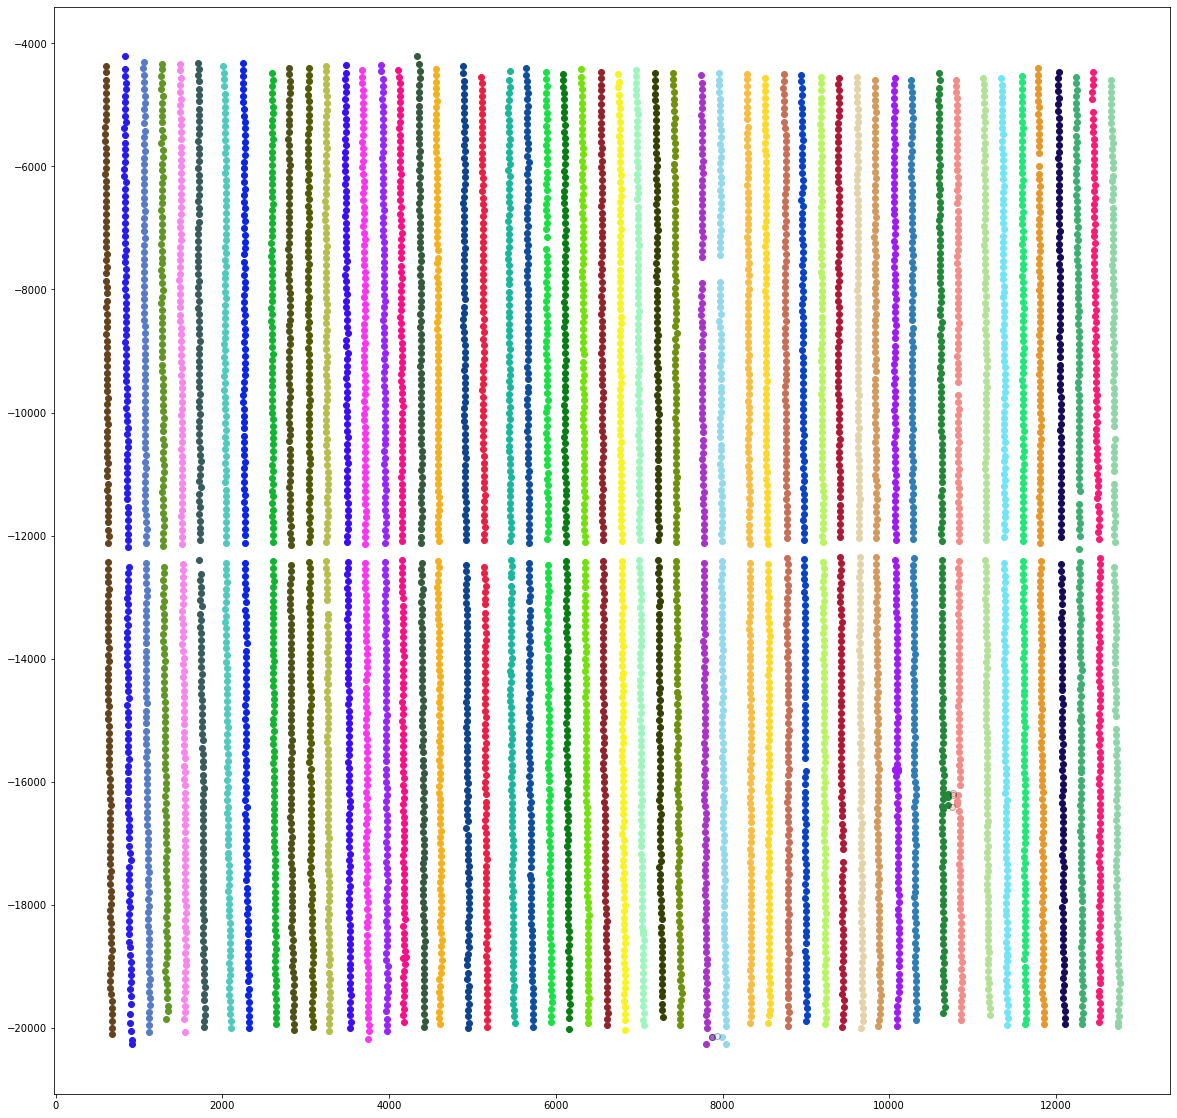

,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep,cvt_x,cvt_y,fid
57,48.0,58.0,1476.0,2553.0,3883.0,2524.0,3859.0,2582.0,3907.0,368062.841475,3.956059e+06,True,1705.053390,-4323.021294,718
59,65.0,53.0,1779.0,2579.5,3966.5,2553.0,3934.0,2606.0,3999.0,368062.926010,3.956059e+06,True,1713.919228,-4410.175871,719
61,48.0,39.0,1006.0,1912.5,3987.0,1893.0,3963.0,1932.0,4011.0,368060.798280,3.956058e+06,True,1056.820812,-4293.843476,292
63,59.0,63.0,2014.0,2154.5,4063.5,2123.0,4034.0,2186.0,4093.0,368061.570260,3.956058e+06,True,1278.064588,-4418.214980,436
64,60.0,77.0,2412.0,2590.5,4065.0,2552.0,4035.0,2629.0,4095.0,368062.961100,3.956058e+06,True,1704.545349,-4508.843761,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,45.0,48.0,680.0,16565.0,16949.5,16541.0,16927.0,16589.0,16972.0,368107.539755,3.956017e+06,True,12749.124154,-19978.795911,7552
11128,68.0,43.0,1352.0,16328.5,16934.0,16307.0,16900.0,16350.0,16968.0,368106.785320,3.956017e+06,True,12520.790778,-19915.260043,7410
11133,24.0,25.0,314.0,16132.5,17003.0,16120.0,16991.0,16145.0,17015.0,368106.160080,3.956017e+06,True,12314.822943,-19942.720570,7266
11137,47.0,51.0,1212.0,15929.5,17050.5,15904.0,17027.0,15955.0,17074.0,368105.512510,3.956017e+06,True,12106.399373,-19947.703974,7120


In [81]:
#buffer_ratio = 0.5
buffer_ratio = buffer.mean() * 0.5
fid_st = 1

keep_bbox_cp = keep_bbox.copy()
keep_bbox_cp['fid'] = -1

fig, ax = plt.subplots(1,1, figsize=(20,20))

for i in peak_x:
    range_st = i - buffer_ratio
    range_ed = i + buffer_ratio
    
    selected = (keep_bbox.cvt_x >= range_st ) & (keep_bbox.cvt_x <= range_ed)
    
    selected_xy = keep_bbox.loc[selected, ['cvt_x', 'cvt_y']]
    
    color=np.random.rand(3)
    
    X = np.ones((len(selected_xy), 2))
    X[:, 1] = selected_xy.cvt_x

    reg = RANSACRegressor(residual_threshold=15000, max_trials=1000).fit(X, selected_xy['cvt_y'])
    inlier_mask = reg.inlier_mask_
    
    # remove outlier and sort by Y axis
    selected_xy_sort = selected_xy.loc[inlier_mask,:].sort_values(by=['cvt_y'], ascending=False)
    fid = np.linspace(fid_st, len(selected_xy_sort)+fid_st-1, num=len(selected_xy_sort)).astype(int)
    
    selected_xy_sort['fid'] = fid
    keep_bbox_cp.loc[selected_xy_sort.index, 'fid'] = selected_xy_sort.fid
    
    fid_st += len(selected_xy_sort)
    
    non_selected_xy = selected_xy.loc[~inlier_mask,:]
    ax.scatter(selected_xy_sort.cvt_x, selected_xy_sort.cvt_y, color=color)
    ax.scatter(non_selected_xy.cvt_x, non_selected_xy.cvt_y, color=color, edgecolors='k', alpha=0.3)

plt.show()
keep_bbox_cp

In [82]:
fid_positive = keep_bbox_cp[keep_bbox_cp.fid > 0]
fid_positive

,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep,cvt_x,cvt_y,fid
57,48.0,58.0,1476.0,2553.0,3883.0,2524.0,3859.0,2582.0,3907.0,368062.841475,3.956059e+06,True,1705.053390,-4323.021294,718
59,65.0,53.0,1779.0,2579.5,3966.5,2553.0,3934.0,2606.0,3999.0,368062.926010,3.956059e+06,True,1713.919228,-4410.175871,719
61,48.0,39.0,1006.0,1912.5,3987.0,1893.0,3963.0,1932.0,4011.0,368060.798280,3.956058e+06,True,1056.820812,-4293.843476,292
63,59.0,63.0,2014.0,2154.5,4063.5,2123.0,4034.0,2186.0,4093.0,368061.570260,3.956058e+06,True,1278.064588,-4418.214980,436
64,60.0,77.0,2412.0,2590.5,4065.0,2552.0,4035.0,2629.0,4095.0,368062.961100,3.956058e+06,True,1704.545349,-4508.843761,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11114,54.0,66.0,2015.0,15907.0,16949.0,15874.0,16922.0,15940.0,16976.0,368105.440735,3.956017e+06,True,12105.129689,-19843.747772,7119
11115,45.0,48.0,680.0,16565.0,16949.5,16541.0,16927.0,16589.0,16972.0,368107.539755,3.956017e+06,True,12749.124154,-19978.795911,7552
11128,68.0,43.0,1352.0,16328.5,16934.0,16307.0,16900.0,16350.0,16968.0,368106.785320,3.956017e+06,True,12520.790778,-19915.260043,7410
11133,24.0,25.0,314.0,16132.5,17003.0,16120.0,16991.0,16145.0,17015.0,368106.160080,3.956017e+06,True,12314.822943,-19942.720570,7266


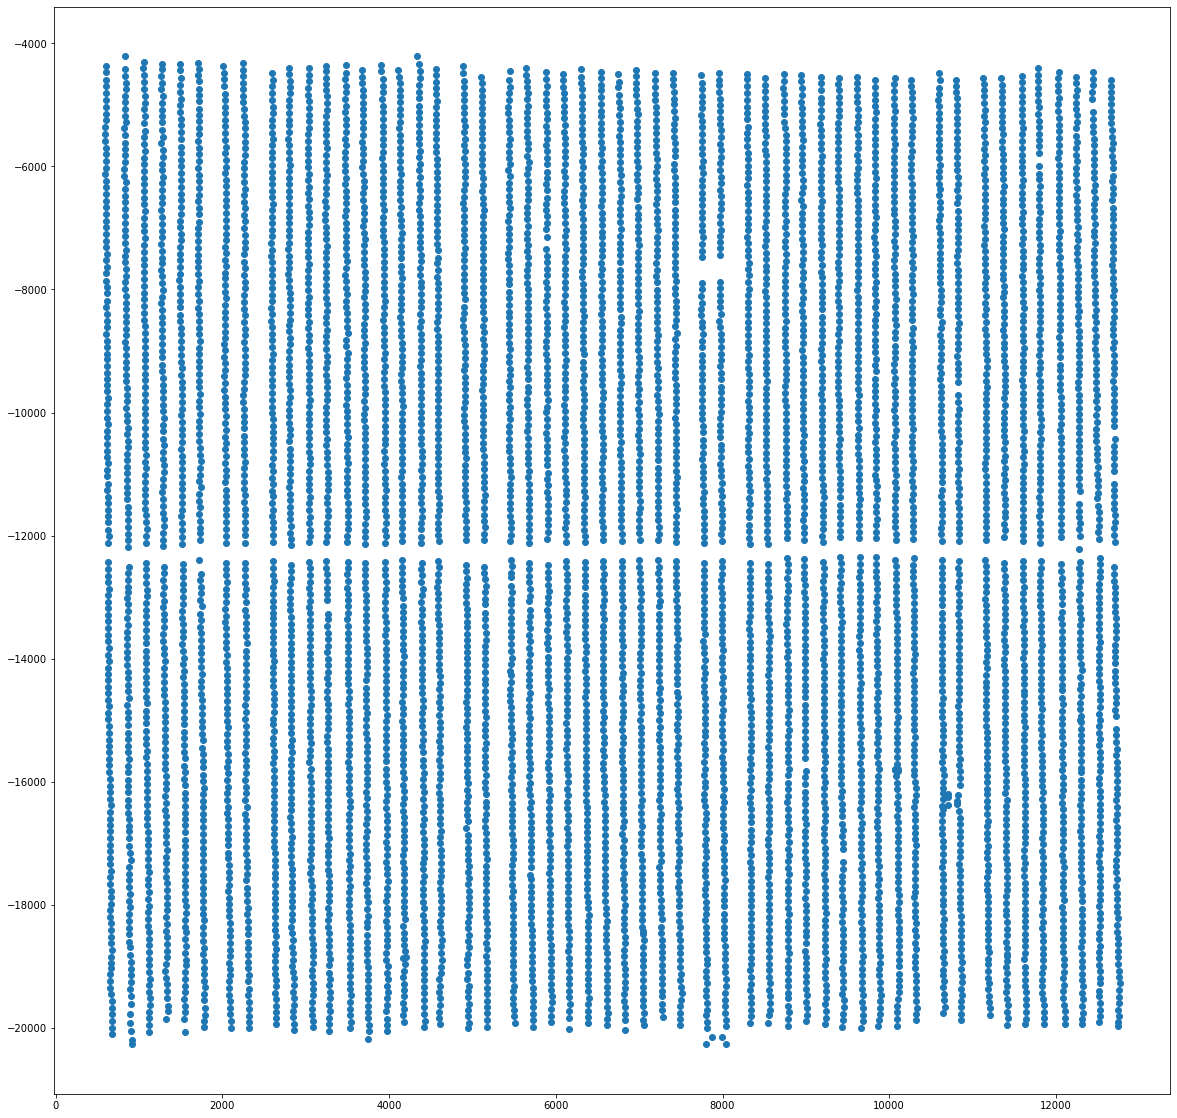

In [83]:
fig, ax = plt.subplots(1,1, figsize=(20,20))

ax.scatter(fid_positive.cvt_x, fid_positive.cvt_y)

plt.show()

In [84]:
with shapefile.Writer(r'Z:\共享云端硬盘\broccoliProject\10_locate_by_cv\color_label_0417_mavic\keep_points.shp') as shp:
    shp.field('name', 'C')
    for index, row in fid_positive.iterrows():
        shp.point(row.x_geo, row.y_geo)
        shp.record(str(row.fid))

In [88]:
keep_bbox_cp.to_csv(r"Z:\共享云端硬盘\broccoliProject\10_locate_by_cv\color_label_0417_mavic\keep_bbox_cp.csv")

# find some strange

In [85]:
fid_positive[fid_positive.fid == 5914]

,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep,cvt_x,cvt_y,fid
8778,70.0,70.0,2418.0,13096.0,13311.0,13061.0,13276.0,13131.0,13346.0,368096.473645,3.956029e+06,True,10097.429711,-15707.788864,5914


In [86]:
ts = TiffSpliter(tif_path=p4d.dom_file, grid_h=1300, grid_w=1300, grid_buffer=200)

In [87]:
ts.search_grid(13096, 13311)

(10, 10)